In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import skimage.io
import skimage.feature
import skimage.transform
import skimage
import skimage.color

import os
from glob import glob
import re

%matplotlib inline

In [2]:
# read the folders in a list
folder = os.listdir('data')
print(folder)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [3]:
all_path =[]
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))
    

In [4]:
all_path

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [5]:
# read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [6]:
len(img_all)

2057

In [7]:
img_all.files

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [8]:
# labeling
# extract text folder
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head\\',text).group(1)
    except:
        label = re.search(r'./data/(.*?)\\',text).group(1)
        
    return label.lower()

In [9]:
labels = list(map(extract_label,img_all.files))

In [10]:
len(labels)

2057

In [11]:
def buffer(io):
    return io

img_all_arrs = np.array(list(map(buffer,img_all)))
# img_all[2]

In [12]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [13]:
data = dict()

data['description'] ='There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [14]:
# save the file in pickle
import pickle
import collections

In [20]:
pickle.dump(data,open('data_animals_head_20.pickle','wb'))

---

In [15]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

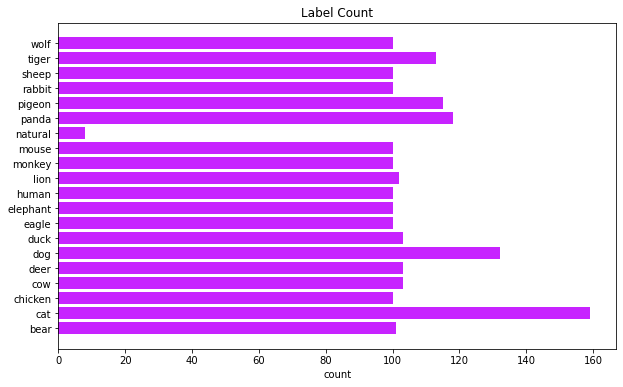

In [16]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values,color='#C723FF')
plt.xlabel('count')
plt.title('Label Count')
plt.show()

In [17]:
data['data'].shape

(2057, 80, 80, 3)

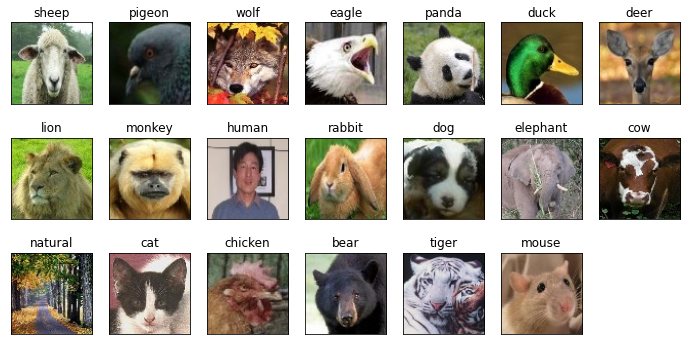

In [18]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c)
    
plt.show()

# Load the data

In [25]:
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [28]:
data['description']

'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'

In [29]:
X= data['data'] # independent
y= data['target'] # dependent


In [30]:
X

array([[[[196, 214, 188],
         [196, 214, 188],
         [196, 215, 187],
         ...,
         [ 81,  76,  80],
         [ 81,  76,  80],
         [ 69,  64,  68]],

        [[196, 214, 188],
         [196, 214, 188],
         [196, 215, 187],
         ...,
         [ 82,  77,  81],
         [ 83,  78,  82],
         [ 77,  72,  76]],

        [[193, 213, 185],
         [194, 214, 186],
         [194, 214, 186],
         ...,
         [ 82,  77,  81],
         [ 82,  76,  80],
         [ 79,  73,  77]],

        ...,

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 70,  65,  69],
         [ 65,  60,  66],
         [ 62,  57,  63]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 66,  61,  65],
         [ 62,  57,  63],
         [ 64,  59,  65]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 56,  51,  55],
        

In [31]:
y

['bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'c

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [36]:
X_train.shape,X_test.shape,len(y_train),len(y_test)

((1645, 80, 80, 3), (412, 80, 80, 3), 1645, 412)

 **Feature Extraction**
 - Hog


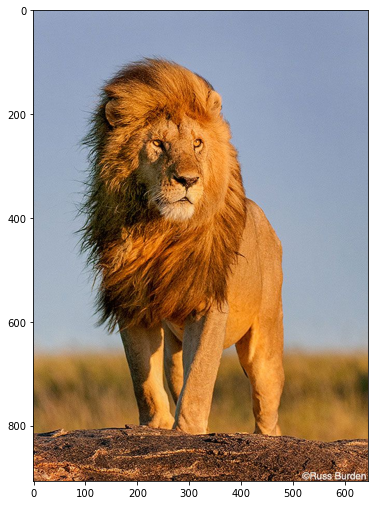

In [41]:
img = skimage.io.imread(r'C:\Users\Ayush\OneDrive\Desktop\Images\lion.bmp')
plt.figure(figsize=(6,10))
plt.imshow(img)

In [42]:
img_re = skimage.transform.rescale(img,1/3).reshape((302,215))
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,
                    pixels_per_cell=(14,14),
                    cells_per_block=(2,2),
                    visualize=True)

<ipython-input-42-53e7e2be06ae>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = skimage.color.rgb2gray(img_re)


In [43]:
len(feature_vector)

10080

In [44]:
gray.shape

(302, 215)

In [45]:
302*215

64930

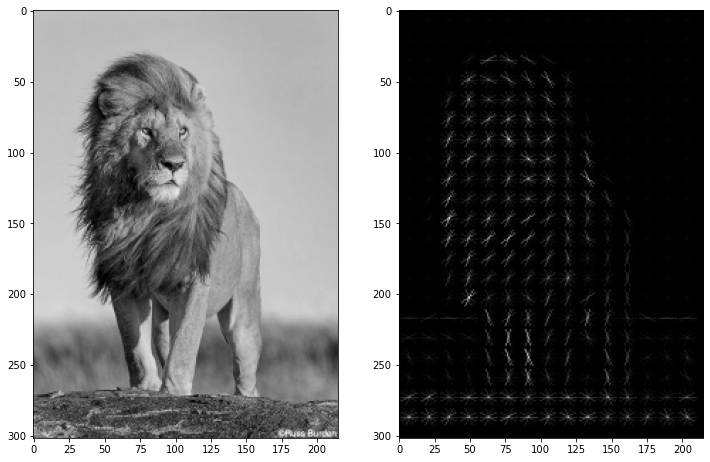

In [49]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

## Preprocessing
- Grayscale
- Hog (histogram oriented gradient) tranformer

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.color import rgb2gray

In [51]:
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [52]:
X_train.shape

(1645, 80, 80, 3)

In [53]:
rgb2grayobj = rgb2gray_transform()
X_train_gray = rgb2grayobj.fit_transform(X_train)

In [54]:
X_train_gray.shape

(1645, 80, 80)

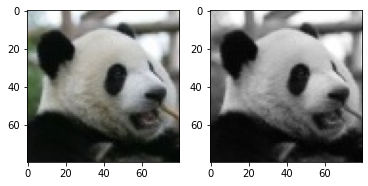

In [57]:
plt.subplot(1,2,1)
plt.imshow(X_train[10])
plt.subplot(1,2,2)
plt.imshow(X_train_gray[10],cmap='gray')

In [65]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features,hog_img = skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block,visualize=True)
            
            return hog_img
        
        #hfeatures = np.array([local_hog(x) for x in X])
        hog_imgs = np.array([local_hog(x) for x in X])
        return hog_imgs

In [66]:
hogt = hogtransformer()

In [67]:
X_train_hog = hogt.fit_transform(X_train_gray)

In [68]:
X_train_hog.shape

(1645, 80, 80)

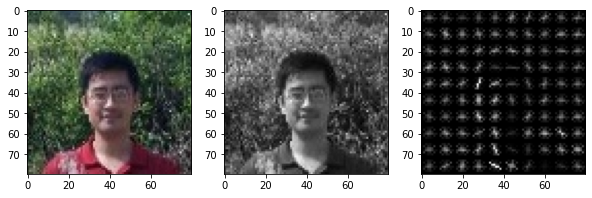

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(X_train[12])
plt.subplot(1,3,2)
plt.imshow(X_train_gray[12],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(X_train_hog[12],cmap="gray")

In [72]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block)
            
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [74]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.1,)

In [75]:
X_train.shape,X_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [76]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [77]:
#pipline

# step-1: Convert into gray scale
X_train_gray = grayify.fit_transform(X_train)
# step-2: extract the feature
X_train_hog = hogify.fit_transform(X_train_gray)
# step-3: Nomalization
X_train_scale = scalify.fit_transform(X_train_hog)
# step-4: Machine Learning
model_sgd.fit(X_train_scale,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
X_test_gray = grayify.fit_transform(X_test)
# step-2: extract the features
X_test_hog = hogify.fit_transform(X_test_gray)
# step-3: Normalization
X_test_scale = scalify.transform(X_test_hog)

y_pred_test = model_sgd.predict(X_test_scale)

In [80]:
y_pred_test

array(['dog', 'bear', 'pigeon', 'cat', 'pigeon', 'panda', 'panda', 'wolf',
       'cow', 'eagle', 'monkey', 'deer', 'monkey', 'panda', 'human',
       'human', 'cow', 'panda', 'panda', 'cat', 'mouse', 'duck', 'duck',
       'rabbit', 'monkey', 'sheep', 'cow', 'rabbit', 'cow', 'wolf',
       'tiger', 'pigeon', 'mouse', 'cat', 'cow', 'panda', 'sheep', 'wolf',
       'duck', 'rabbit', 'pigeon', 'human', 'panda', 'bear', 'chicken',
       'pigeon', 'pigeon', 'cat', 'chicken', 'tiger', 'tiger', 'eagle',
       'cat', 'pigeon', 'elephant', 'rabbit', 'cat', 'sheep', 'dog',
       'sheep', 'human', 'pigeon', 'monkey', 'panda', 'chicken', 'duck',
       'wolf', 'deer', 'panda', 'monkey', 'cat', 'cat', 'panda', 'tiger',
       'cat', 'tiger', 'human', 'panda', 'pigeon', 'panda', 'wolf',
       'duck', 'tiger', 'elephant', 'tiger', 'monkey', 'duck', 'mouse',
       'human', 'rabbit', 'chicken', 'panda', 'human', 'human', 'panda',
       'wolf', 'eagle', 'deer', 'mouse', 'monkey', 'rabbit', 'dog',

In [81]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.529412,0.450000,0.486486,20.000000
cat,0.547619,0.718750,0.621622,32.000000
chicken,0.444444,0.600000,0.510638,20.000000
cow,0.565217,0.619048,0.590909,21.000000
deer,0.833333,0.714286,0.769231,21.000000
dog,0.500000,0.538462,0.518519,26.000000
duck,0.576923,0.714286,0.638298,21.000000
eagle,0.687500,0.550000,0.611111,20.000000
elephant,0.600000,0.450000,0.514286,20.000000
human,0.678571,0.950000,0.791667,20.000000


In [82]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5584825016666563

## Pipeline Model

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
model_pipe = Pipeline([
    ('grayscale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
])

In [87]:
model_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('grayscale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(cells_per_block=(3, 3), orientations=8,
                                pixels_per_cell=(10, 10))),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.001,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='adaptive', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [89]:
y_pred_test = model_pipe.predict(X_test)

In [90]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True))

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
cr.T

,precision,recall,f1-score,support
bear,0.785714,0.550000,0.647059,20.000000
cat,0.567568,0.656250,0.608696,32.000000
chicken,0.722222,0.650000,0.684211,20.000000
cow,0.608696,0.666667,0.636364,21.000000
deer,0.850000,0.809524,0.829268,21.000000
dog,0.375000,0.346154,0.360000,26.000000
duck,0.777778,0.666667,0.717949,21.000000
eagle,0.714286,0.500000,0.588235,20.000000
elephant,0.812500,0.650000,0.722222,20.000000
human,0.857143,0.900000,0.878049,20.000000


# Grid Search
- Hyperparameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
estimator = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [95]:
param_grid = [
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['optimal'] 
    },
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['adaptive'],
        'sgd__eta0' : [0.001,0.01]
        
    }
]

In [96]:
model_grid = GridSearchCV(estimator,
                          param_grid=param_grid,scoring='accuracy',
                          n_jobs=1,cv=3,verbose=2)

In [97]:
model_grid.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__los

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   7.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   7.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   6.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtr

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   6.5s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   3.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sg

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__los

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   6.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   7.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   7.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtr

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   4.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   4.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   8.6s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   3.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sg

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__or

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtran

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orienta

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  10.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  11.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  10.5s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientat

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   6.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   6.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   5.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransfo

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  13.4s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  15.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  17.9s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientatio

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  15.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  14.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  15.5s
[CV] hogtransform__cells_per_block=(2, 2), ho

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   8.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   9.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 


C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'float' object cannot be interpreted as an integer

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.5s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, 

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3)

[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtran

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  24.8s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  22.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  23.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtran

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  19.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  10.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   9.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtrans

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  23.5s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  24.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  24.3s
[CV] hogtransform__cells_per_block=(3, 3), hog

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  14.0s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  14.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  13.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtr

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   7.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   7.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   7.2s
[CV] hogtransform__cells_per_block=(3, 3), hogtrans

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed: 60.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('grascale', rgb2gray_transform()),
                                       ('hogtransform',
                                        hogtransformer(cells_per_block=(3, 3),
                                                       orientations=9,
                                                       pixels_per_cell=(8, 8))),
                                       ('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgd',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                          

In [98]:
model_grid.best_params_

{'hogtransform__cells_per_block': (3, 3),
 'hogtransform__orientations': 9,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [99]:
model_grid.best_score_

0.7325196442104424

In [100]:
model_best = model_grid.best_estimator_

In [102]:
y_pred = model_best.predict(X_test)

In [103]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.666667,0.700000,0.682927,20.000000
cat,0.764706,0.812500,0.787879,32.000000
chicken,0.833333,0.750000,0.789474,20.000000
cow,0.850000,0.809524,0.829268,21.000000
deer,0.941176,0.761905,0.842105,21.000000
dog,0.548387,0.653846,0.596491,26.000000
duck,0.772727,0.809524,0.790698,21.000000
eagle,0.666667,0.700000,0.682927,20.000000
elephant,0.850000,0.850000,0.850000,20.000000
human,0.909091,1.000000,0.952381,20.000000


In [104]:
pickle.dump(model_best,open('dsa_best_model.pickle','wb'))

## Make Pipeline


In [105]:
from sklearn.pipeline import make_pipeline

In [106]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                            hogtransformer(orientations=10,
                                           pixels_per_cell=(8,8),
                                           cells_per_block=(2,2)))

In [107]:
feature_vector = pipeline1.fit_transform(X_train)

In [108]:
# standard scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [109]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [110]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
# evaluate
feature_vector = pipeline1.fit_transform(X_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [113]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

C:\Users\Ayush\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.681818,0.750000,0.714286,20.000000
cat,0.622222,0.875000,0.727273,32.000000
chicken,0.800000,0.800000,0.800000,20.000000
cow,0.888889,0.761905,0.820513,21.000000
deer,0.941176,0.761905,0.842105,21.000000
dog,0.615385,0.615385,0.615385,26.000000
duck,0.714286,0.714286,0.714286,21.000000
eagle,0.866667,0.650000,0.742857,20.000000
elephant,0.800000,0.800000,0.800000,20.000000
human,1.000000,0.900000,0.947368,20.000000


In [114]:
# save models for flask app
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [115]:
pickle.dump(scalar,open('dsa_scaler.pickle','wb'))

# Output Analysis

In [117]:
model_p = pickle.load(open('dsa_best_model.pickle','rb'))

In [118]:
model_p.get_params()

{'memory': None,
 'steps': [('grascale', rgb2gray_transform()),
  ('hogtransform',
   hogtransformer(cells_per_block=(3, 3), orientations=9, pixels_per_cell=(8, 8))),
  ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('sgd',
   SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                 early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                 l1_ratio=0.15, learning_rate='optimal', loss='hinge',
                 max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
                 power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                 validation_fraction=0.1, verbose=0, warm_start=False))],
 'verbose': False,
 'grascale': rgb2gray_transform(),
 'hogtransform': hogtransformer(cells_per_block=(3, 3), orientations=9, pixels_per_cell=(8, 8)),
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sgd': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               ear